<a href="https://colab.research.google.com/github/caloriesqueen/fastaicourse/blob/master/Chpt_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [40]:
path = untar_data(URLs.MNIST_SAMPLE) ; path

PosixPath('/root/.fastai/data/mnist_sample')

In [41]:
path.ls()

[PosixPath('/root/.fastai/data/mnist_sample/valid'),
 PosixPath('/root/.fastai/data/mnist_sample/labels.csv'),
 PosixPath('/root/.fastai/data/mnist_sample/train')]

In [0]:
path_img = path/'train'

[PosixPath('/root/.fastai/data/mnist_sample/train/3'),
 PosixPath('/root/.fastai/data/mnist_sample/train/7')]

[]

In [0]:
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
data = ImageDataBunch.from_folder(path, ds_tfms =get_transforms(do_flip=False), bs= 64).normalize(imagenet_stats)

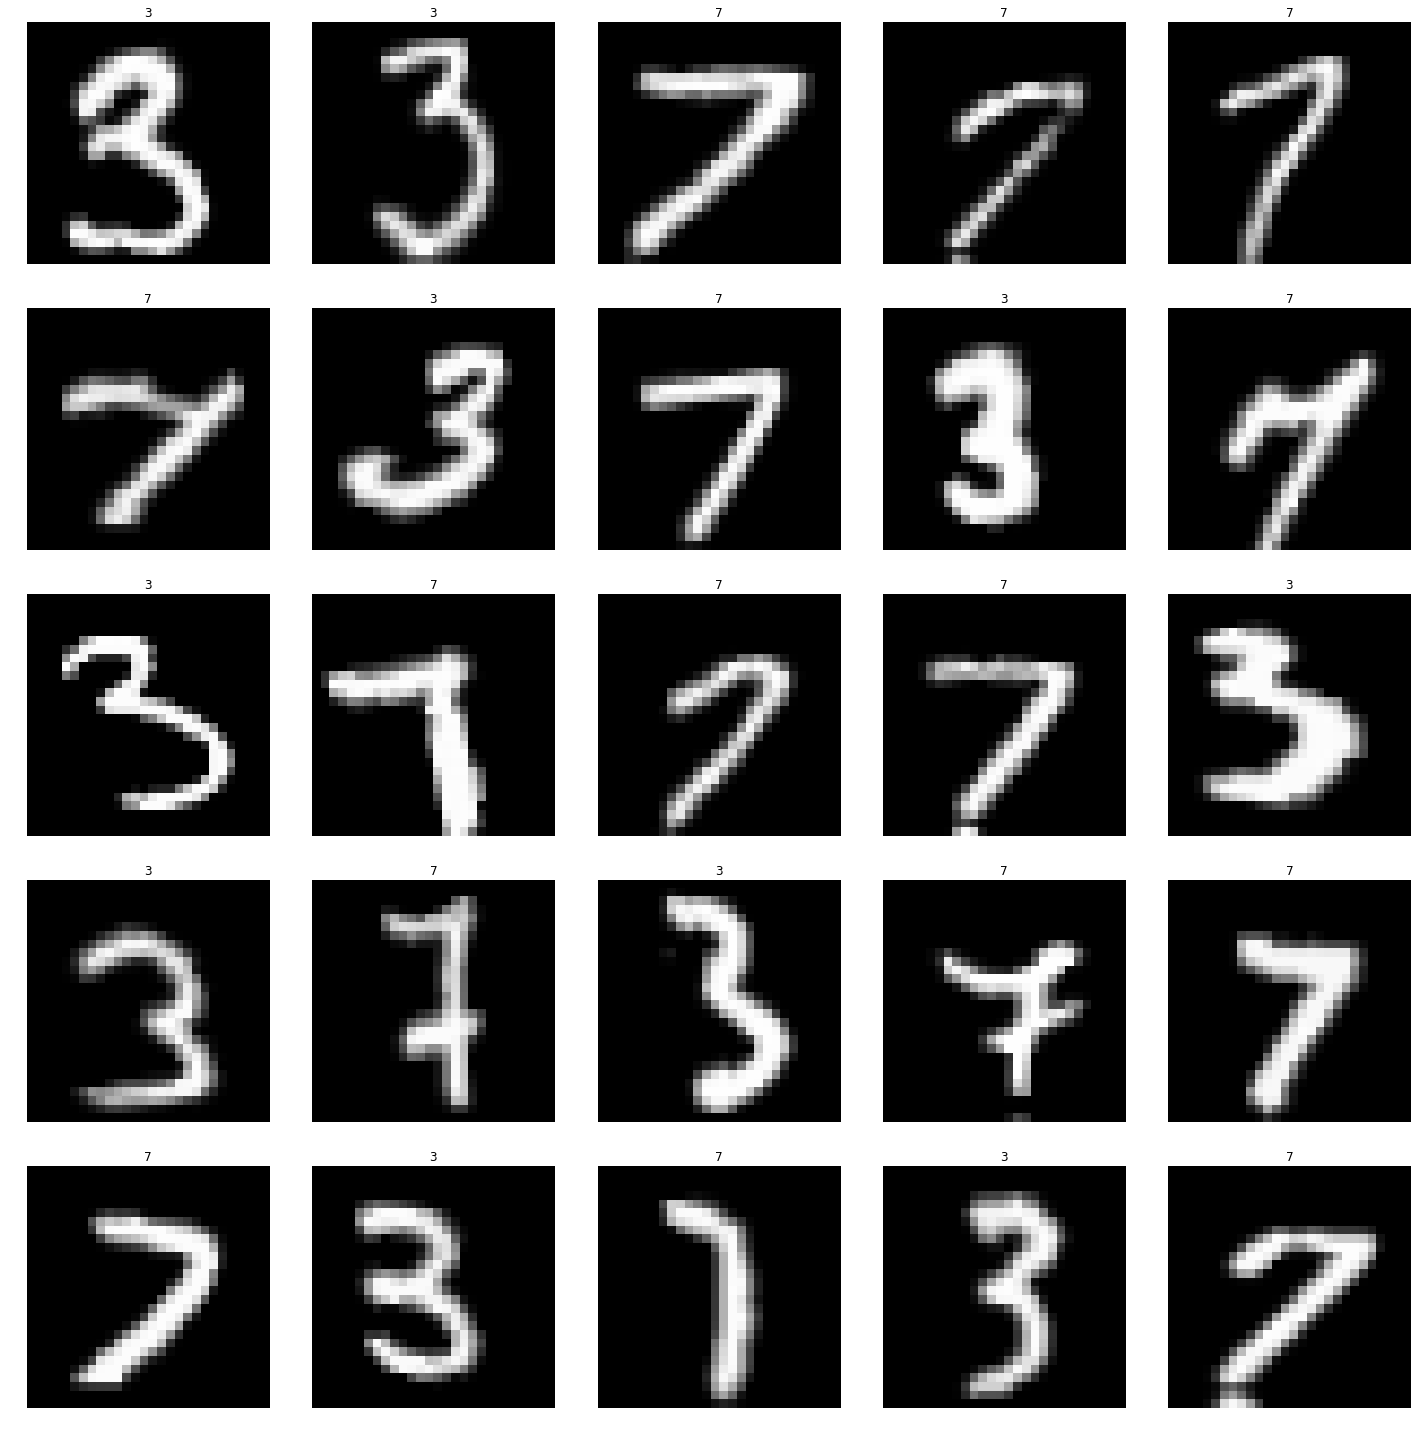

In [47]:
data.show_batch(5)

In [0]:
learn = cnn_learner(data, models.resnet34 , metrics=error_rate)

In [49]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.313239,0.186649,0.067223,00:26
1,0.146149,0.078095,0.030422,00:25
2,0.096802,0.076426,0.027478,00:25
3,0.089601,0.047525,0.016192,00:25


In [0]:
learn.save('learn-1-34')

In [51]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


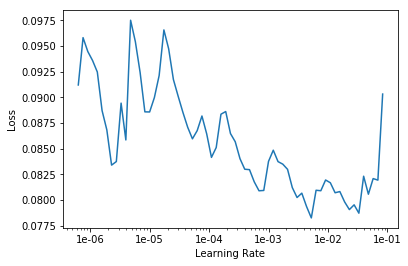

In [52]:
learn.recorder.plot()

In [54]:
learn.unfreeze()

learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.023661,0.006526,0.002453,00:27


In [57]:
learn.fit_one_cycle(2, max_lr=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.008245,0.001292,0.000000,00:27
1,0.004802,0.001548,0.000491,00:27


In [0]:
learn.save('learn-uf-2')

interp = ClassificationInterpretation.from_learner(learn)





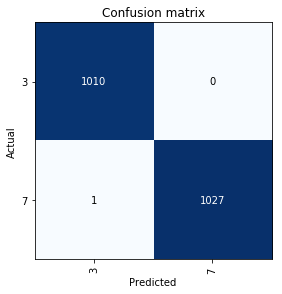

In [60]:
interp.plot_confusion_matrix()
